## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import our data at df 
df =  pd.read_csv("ab_data.csv")
#appear the head of our dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#N. of rows of our dataset
#first way 
print(len(df))
total =  len(df)
#second way 
print(df.count() +1 )

294478
user_id         294479
timestamp       294479
group           294479
landing_page    294479
converted       294479
dtype: int64


c. The number of unique users in the dataset.

In [4]:
#N.unique user id
df["user_id"].nunique()

290584

d. The proportion of users converted.

In [5]:
#user converted of unique user_id
converted1=float(df.query('converted == 1')['user_id'].nunique())
print(converted1)
#proportion user converted
b_1 = (converted1/total)
print(b_1)
#percent 
print("%",b_1*100 )

35173.0
0.1194418598333322
% 11.94418598333322


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#N.of new page and treatmetn which not match
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [7]:
if df.isnull().values.any():
    print("True")
else: 
    print("False")

False


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#crete new dataset called df2
df2 = df.drop(df.query('(group != "treatment" and landing_page == "new_page") or (group == "treatment" and landing_page != "new_page") or (group == "control" and landing_page != "old_page") or (group == "control" and landing_page != "old_page")').index)
print(df2)

        user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
5        936923  2017-01-10 15:20:49.083499    control     old_page          0
6        679687  2017-01-19 03:26:46.940749  treatment     new_page          1
7        719014  2017-01-17 01:48:29.539573    control     old_page          0
8        817355  2017-01-04 17:58:08.979471  treatment     new_page          1
9        839785  2017-01-15 18:11:06.610965  treatment     new_page          1
10       929503  2017-01-18 05:37:11.527370  treatment     new_page          0
11       834487  2017-01-21 22:37:47.774891  treatme

In [9]:
# Double Check all of the correct rows were removed - this should be 0
yy= df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False]
print(len(yy))

0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#unique user_id in new dataset which we create
df2['user_id'].nunique()


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#appear our duplicated user_did
x = df2[df2.duplicated(['user_id'], keep=False)]['user_id']
print(x)

1899    773192
2893    773192
Name: user_id, dtype: int64


c. What is the row information for the repeat **user_id**? 

In [12]:
y = df2[df2['user_id'] == 773192]
print(y)
print("============================================================================")

#first duplicated user_id
print("FIRST")
print("-----------")
x1 = y.iloc[1,:]
print(x1)
print("===========================================")
#second duplicated user_id
print("SECOND")
print("-----------")
x2 = y.iloc[0,:]
print(x2)

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0
FIRST
-----------
user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2893, dtype: object
SECOND
-----------
user_id                             773192
timestamp       2017-01-09 05:37:58.781806
group                            treatment
landing_page                      new_page
converted                                0
Name: 1899, dtype: object


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#removing the second duplicated userid
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == "2017-01-09 05:37:58.781806")].index)

#make sure that is deleted
x = df2[df2.duplicated(['user_id'], keep=False)]['user_id']
print(x)

df2.head()

Series([], Name: user_id, dtype: int64)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#lenght of df2 
total2 = len(df2)
print(total2)
print("-----------")

#user converted of unique user_id
converted2 = float(df2.query('converted == 1')['user_id'].nunique())
print(converted2)
print("-----------")

#proportion user converted
b2 = converted2/float(total2)
print(b2)
print("-----------")

#percent 
print("%",b2*100)


290584
-----------
34753.0
-----------
0.11959708724499628
-----------
% 11.959708724499627


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#N of converted user 1  and control group
convertedcontrolusers2 = float(df2.query('converted == 1 and group == "control"')['user_id'].nunique())
print(convertedcontrolusers2)
print("-----------")

#N of  group control
controlusers2 =float(df2.query('group == "control"')['user_id'].nunique())
print(controlusers2)
print("-----------")

#problaity of converted
b3 = convertedcontrolusers2 /controlusers2
print(b3)
print("-----------")

#percent
print("% " ,b3*100)

17489.0
-----------
145274.0
-----------
0.1203863045004612
-----------
%  12.03863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#N of converted user 1  and control group
convertedcontrolusers3 = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
print(convertedcontrolusers3)
print("-----------")

#N of  group control
controlusers3 =float(df2.query('group == "treatment"')['user_id'].nunique())
print(controlusers3)
print("-----------")

#problaity of converted
b4 = convertedcontrolusers3 /controlusers3
print(b4)
print("-----------")

#percent
print("% " ,b4*100)

17264.0
-----------
145310.0
-----------
0.11880806551510564
-----------
%  11.880806551510565


d. What is the probability that an individual received the new page?

In [17]:
#user converted of unique user_id of new page
new_page2 = float(df2.query('landing_page == "new_page"')['user_id'].nunique())
print(new_page2)
print("-----------")

#problaity of converted
b5 = new_page2/float(total2)
print(b5 )
print("-----------")

#percent
print("%",b5*100)

145310.0
-----------
0.5000619442226688
-----------
% 50.00619442226688


In [18]:
#N of converted user 1  and control group
convertedcontrolusers4 = float(df2.query('converted == 1 and group == "treatment"')['user_id'].nunique())
print(convertedcontrolusers4)
print("-----------")

#N of  group control
controlusers4 =float(df2.query('group == "treatment"')['user_id'].nunique())
print(controlusers4)
print("-----------")

#problaity of converted
b5 = convertedcontrolusers4 /controlusers4
print(b5)
print("-----------")

#percent
print("% " ,b5*100)

17264.0
-----------
145310.0
-----------
0.11880806551510564
-----------
%  11.880806551510565


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null hypothese is H0: p_new - p_old <= 0  
Alternative hypothese is H1: p_new - p_old > 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [19]:
#conversion rate convunder the null
Pnew = float(df2.query('converted == 1')['user_id'].nunique())/float(df2['user_id'].nunique())
print(Pnew)

0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [20]:
#conversion rate p old convunder the null
Pold = float(df.query('converted == 1')['user_id'].nunique())/float(df['user_id'].nunique())
print(Pold)

0.12104245244060237


c. What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# number of individuals in the treatment group
N_individuals_treatment = df2.query('group == "treatment"')['user_id'].nunique()
print(N_individuals_treatment)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [22]:
#  number of individuals in the treatment group
N_individuals_control = df2.query('group == "control"')['user_id'].nunique() 
print(N_individuals_control)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
#n_new_page
N_newpage = df2.query('landing_page == "new_page"')['user_id'].nunique()
print(N_newpage)
print("----------")

new_page_converted = np.random.choice([0,1],N_newpage, p=(Pnew,1-Pnew))
new_page_converted

145310
----------


array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
#N_old page
N_oldpage = df2.query('landing_page == "old_page"')['user_id'].nunique() 
print(N_newpage)
print("----------")


old_page_converted = np.random.choice([0,1],N_oldpage, p=(Pold,1-Pold))
old_page_converted

145310
----------


array([1, 1, 1, ..., 1, 0, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
#Compute the probablity of new page converted rate
x1 = new_page_converted.mean()
print(x1)
print("----------")


#Compute the probablity of old page converted rate
x2 = old_page_converted.mean()
print(x2)
print("----------")


#P new -  P old
xx = x1 - x2
xx 

0.880579450829
----------
0.879579277779
----------


0.0010001730507189777

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [26]:
#Import timeit library
import timeit

#starting time
start = timeit.default_timer()

# Create sampling distribution for difference in completion rates
diffs = []
size = len(df)
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],N_newpage, p=(Pnew,1-Pnew))
    old_page_converted = np.random.choice([0,1],N_oldpage, p=(Pold,1-Pold))
    diffs.append(new_page_converted.mean() - old_page_converted.mean())
    
#Compute python running time.
stop = timeit.default_timer()
print (stop - start )


#convert to numpy array
diffs = np.array(diffs)

print(diffs)

758.5019142449999
[-0.00092696  0.00220482  0.0015028  ...,  0.00099338  0.00219094
  0.00123401]


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    9.,   114.,   482.,  1609.,  2709.,  2816.,  1574.,   579.,
           99.,     9.]),
 array([-0.00317075, -0.00224845, -0.00132616, -0.00040386,  0.00051844,
         0.00144073,  0.00236303,  0.00328532,  0.00420762,  0.00512991,
         0.00605221]),
 <a list of 10 Patch objects>)

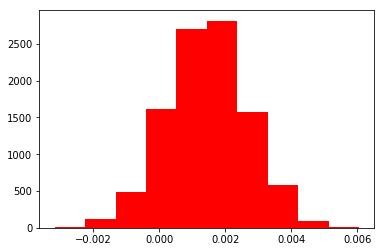

In [27]:
plt.hist(diffs,color = "r")

In [28]:
# Create number of users with all new_page users and all new_page users
new = df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
print(new)
# Compute real converted rate
print("-----------------")
print("real conv rate")
real_cvt_new = float(new/ N_newpage) 
print(real_cvt_new)

print("========================================================================")

# Create number of users with all old_page users and all old_page users
old = df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
print(old)
# Compute real converted rate
print("-----------------")
print("real conv rate")
real_cvt_old = float(old/ N_oldpage)
print(real_cvt_old)
print("========================================================================")
diff = real_cvt_new - real_cvt_old
print(diff)

17264
-----------------
real conv rate
0.11880806551510564
17489
-----------------
real conv rate
0.1203863045004612
-0.0015782389853555567


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.90249999999999997

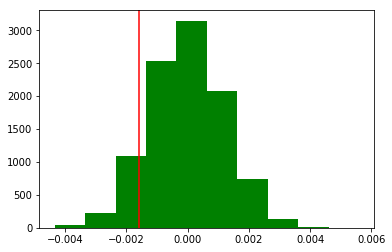

In [29]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)



#Plot Null distribution
plt.hist(null_vals,color = "g" )
#Plot vertical line for observed statistic
plt.axvline(x=diff,color ='red')



#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals >diff).mean()

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We here failed to ignore the null  because Pold  is bigger than alpha and  type error rate is 5 5

so , the data willl be shown with 0.05 of type I error rate

so  , the new page has less problaity of convert rate than old page 

the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm

convert_old = old
convert_new = new 
n_old = N_oldpage
n_new = N_newpage

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [31]:
#import libraries
import statsmodels.api as sm
from scipy.stats import norm


#score and value of proportions_ztest
score, value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')

print("values  is  : ", value)
print("Score is  : " ,score)



#significant  of score 
norm_score = norm.cdf(score)
print("significant  of score :",norm_score)




#critical value  confidence 
conf = norm.ppf(1-(0.05/2))
print("critical value  confidence:",conf )

z_score = score
p_value = value

values  is  :  0.905058312759
Score is  :  -1.31092419842
significant  of score : 0.094941687241
critical value  confidence: 1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Unfortunately we fail to ignore  the null hypothesis of old page because     the score of -1.3109241984234394 does not exceed the critical value of 1.959963984540054 

The p values is values  is  :  0.905058312759 

The signficant of score is : 0.094941687241

The  old page users has a more good  converted rate than new page users. 


The converted rate for new page and old page have not much  difference.


so the result in j and k wull be  the same result  


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression, because the   variable response is categorical type. 

logistic regression is multiple regression but with an outcome variable that is a type variable and predictor 
variables that are continuous type and that could not be good 


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
#create new  column 
df2['Intercept'] = 1

print(df2.columns)
df2.head()



Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted',
       'Intercept'],
      dtype='object')


,user_id,timestamp,group,landing_page,converted,Intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [33]:
#create a dummy variable column for which page user recived
df2= df2.join(pd.get_dummies(df2['landing_page']))

df2['page'] = pd.get_dummies(df['group']) ['treatment']


df2.head()



,user_id,timestamp,group,landing_page,converted,Intercept,new_page,old_page,page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [34]:
#import libraries
import statsmodels.api as sm

#Create Logit regression model and fit it
logitsic = sm.Logit(df2['converted'], df2[['Intercept','page']]).fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
#summary of our result
print(logitsic.params)

print(logitsic.summary())

Intercept   -1.988777
page        -0.014989
dtype: float64


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The coef  of ab_page is -0.014989 

The coef  of intercet is -1.9887

The null mean that there is not any differnece between for  control group and treatment group 

p value for ab_page dataset is  0.19  but for intercet is 0.00

 g
Alternative hypotheses mean that there is   differnece between for  control group and treatment group 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?



If it is timestamp we could build conversion rate for user every time he visit our website and we could deal with time as categorical instead of integer like we could use the parts of the day.

But we have some isses with that , wil make the model more complex and not easy   and that will result that we need more time for it 



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
#read country dataset
country = pd.read_csv('countries.csv')
print(len(country ))
print("==================================")
print(len(df2))
print("==================================")

if len(df2)==len(country):
    print("we can add themm to df2")
else: 
    print("we wont be able to add them ")
country.head()

290584
290584
we can add themm to df2


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [37]:

#add ab dataset with country dataset
df3 = df2.merge(country, on ='user_id')
print(len(df3))
print("==================================")
print(df.columns)
print("==================================")

print(df3.info())
print("==================================")
df3.head()


290584
Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 10 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
Intercept       290584 non-null int64
new_page        290584 non-null uint8
old_page        290584 non-null uint8
page            290584 non-null uint8
country         290584 non-null object
dtypes: int64(3), object(4), uint8(3)
memory usage: 18.6+ MB
None


,user_id,timestamp,group,landing_page,converted,Intercept,new_page,old_page,page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US


In [38]:
#repeat everything again
#get dummy variables
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
df3.head()

,user_id,timestamp,group,landing_page,converted,Intercept,new_page,old_page,page,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [39]:
#Create intercept column
df3['Intercept'] = 1
print(df3.columns)
df3.head()


Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted',
       'Intercept', 'new_page', 'old_page', 'page', 'country', 'US', 'UK',
       'CA'],
      dtype='object')


,user_id,timestamp,group,landing_page,converted,Intercept,new_page,old_page,page,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,US,0,0,1


In [40]:
#Create Logit regression model for conveted and country, and us CA and old page as baseline
logict = sm.Logit(df3['converted'], df3[['Intercept','new_page','UK','US','CA']]).fit()

print(logict.params)
print("=======================================")
print(logict.summary())

         Current function value: 0.366113
         Iterations: 35
Intercept   -1.499672
new_page    -0.014943
UK          -0.479716
US          -0.530356
CA          -0.489599
dtype: float64


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [41]:
#Create a new intereacton variable between new page and country US and UK
df3['UK_new_page'] = df3['new_page']* df3['UK']
df3['US_new_page'] = df3['new_page']* df3['US']
df3['CA_new_page'] = df3['new_page']* df3['CA']



#Create logistic regression for the intereaction variable between new page and country using dummy variable
logit = sm.Logit(df3['converted'], df3[['Intercept','new_page','UK_new_page','US_new_page','CA_new_page','UK','US','CA']]).fit()

print(logit.params)
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 12
Intercept     -1.495676
new_page       7.147189
UK_new_page   -7.136354
US_new_page   -7.214637
CA_new_page   -7.167752
UK            -0.496546
US            -0.508329
CA            -0.490802
dtype: float64


After we made our logistic regression we found that the Coffecient of new page for US ,UK and CA   are differnece more that new page  

The current function value: 0.0.366109

The intercept's p-value is  statistically significant to make convert rate because it has values less than 0.05 but Z score is not big  so we can represent it as   significant to predict the rate of converstion

so the country which user lived in is not important when we focus on the rate of page which user see it 


 

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0